In [1]:
from jax import numpy as jnp
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
    return jnp.maximum(0, preactivation)

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = jnp.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(jnp.matmul(beta_0,jnp.ones((1,n_data))) + jnp.matmul(omega_0,x))
    y = jnp.matmul(beta_1,jnp.ones((1,n_data))) + jnp.matmul(omega_1,h1)
    return y

In [4]:
def get_parameters():
    # And we'll create a network that approximately fits it
    beta_0 = jnp.zeros((3,1));  # formerly theta_x0
    omega_0 = jnp.zeros((3,1)); # formerly theta_x1
    beta_1 = jnp.zeros((1,1));  # formerly phi_0
    omega_1 = jnp.zeros((1,3)); # formerly phi_x

    beta_0 = beta_0.at[0,0].set(0.3)
    beta_0 = beta_0.at[1,0].set(-1.0)
    beta_0 = beta_0.at[2,0].set(-0.5)
    omega_0 = omega_0.at[0,0].set(-1.0)
    omega_0 = omega_0.at[1,0].set(1.8)
    omega_0 = omega_0.at[2,0].set(0.65)
    beta_1 = beta_1.at[0,0].set(0.1)
    omega_1 = omega_1.at[0,0].set(-2.0)
    omega_1 = omega_1.at[0,1].set(-1.0)
    omega_1 = omega_1.at[0,2].set(7.0)

    return beta_0, omega_0, beta_1, omega_1

In [5]:
# Utility function for plotting data
def plot_binary_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
    # Make sure model data are 1D arrays
    x_model = jnp.squeeze(x_model)
    out_model = jnp.squeeze(out_model)
    lambda_model = jnp.squeeze(lambda_model)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(7.0, 3.5)
    fig.tight_layout(pad=3.0)
    ax[0].plot(x_model,out_model)
    ax[0].set_xlabel(r'Input, '); ax[0].set_ylabel(r'Model output')
    ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
    if title is not None:
        ax[0].set_title(title)
    ax[1].plot(x_model,lambda_model)
    ax[1].set_xlabel(r'Input, '); ax[1].set_ylabel(r' or Pr(y=1|x)')
    ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.05,1.05])
    if title is not None:
        ax[1].set_title(title)
    if x_data is not None:
        ax[1].plot(x_data, y_data, 'ko')
    plt.show()

In [6]:
def sigmoid(model_out):
    return 1/(1+jnp.exp(-model_out))

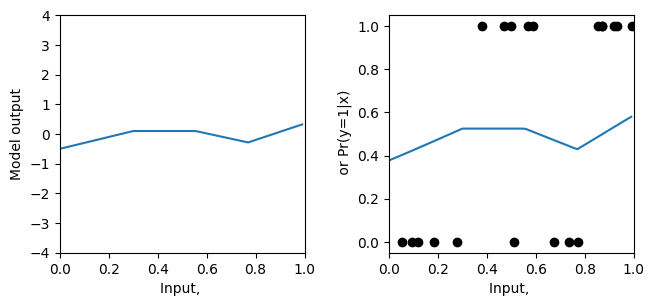

In [8]:
# Let's create some 1D training data
x_train = jnp.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
                     0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
                     0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
                     0.87168699,0.58858043])
y_train = jnp.array([0,1,1,0,0,1,
                     1,0,0,1,0,1,
                     0,1,1,0,1,0,
                     1,1])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()

# Define a range of input values
x_model = jnp.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)


In [9]:
def bernoulli_distribution(y, lambda_param):
    return jnp.power(lambda_param,y)*jnp.power(1-lambda_param,1-y)

In [10]:
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.8,bernoulli_distribution(0,0.2)))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,bernoulli_distribution(1,0.2)))

Correct answer = 0.800, Your answer = 0.800
Correct answer = 0.200, Your answer = 0.200


In [26]:
def compute_likelihood(y_train, lambda_param):
    return jnp.prod(bernoulli_distribution(y_train, lambda_param))

In [27]:

# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the Bernoulli parameter lambda
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000070237,likelihood))


Correct answer = 0.000070237, Your answer = 0.000003111


In [29]:
def compute_negative_log_likelihood(y_train, lambda_param):
    return -jnp.sum(jnp.log(compute_likelihood(y_train, lambda_param)))

In [30]:
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Pass through the sigmoid function
lambda_train = sigmoid(model_out)
# Compute the log likelihood
nll = compute_negative_log_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(9.563639387,nll))

Correct answer = 9.563639387, Your answer = 12.680653572


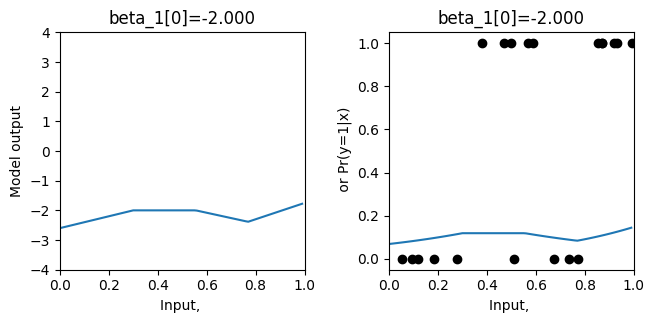

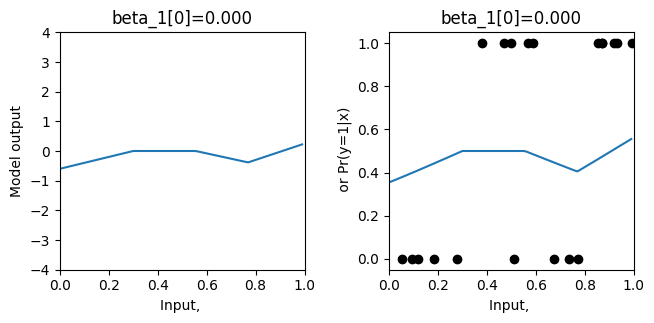

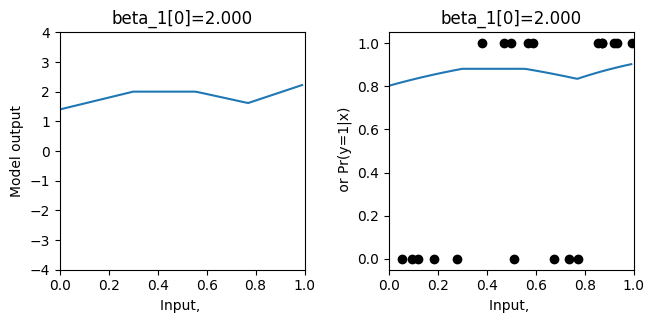

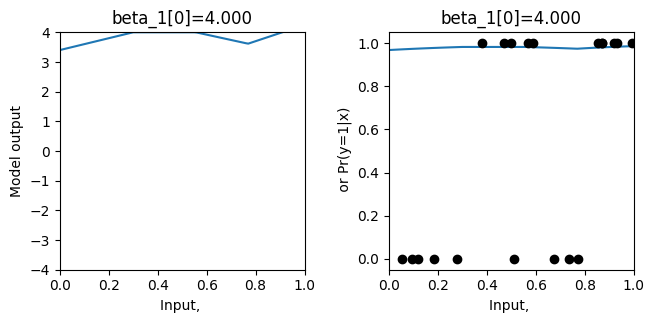

In [31]:
# Define a range of values for the parameter
beta_1_vals = jnp.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = jnp.zeros_like(beta_1_vals)
nlls = jnp.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
    # Set the value for the parameter
    beta_1 = beta_1.at[0,0].set(beta_1_vals[count])
    # Run the network with new parameters
    model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
    lambda_train = sigmoid(model_out)
    # Compute and store the two values
    likelihoods = likelihoods.at[count].set(compute_likelihood(y_train, lambda_train))
    nlls = nlls.at[count].set(compute_negative_log_likelihood(y_train, lambda_train))
    # Draw the model for every 20th parameter setting
    if count % 20 == 0:
        # Run the model to get values to plot and plot it.
        model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
        lambda_model = sigmoid(model_out)
        plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))




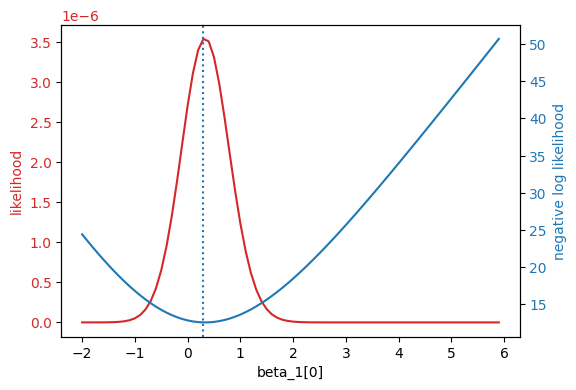

In [33]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[jnp.argmax(likelihoods)], linestyle='dotted')

plt.show()


Maximum likelihood = 0.000004, at beta_1=0.300
Minimum negative log likelihood = 12.550686, at beta_1=0.300


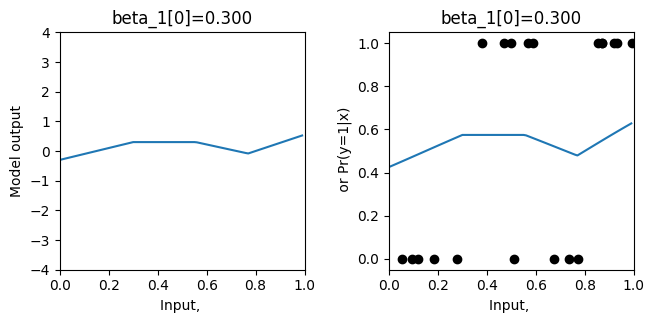

In [36]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[jnp.argmax(likelihoods)],beta_1_vals[jnp.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[jnp.argmin(nlls)],beta_1_vals[jnp.argmin(nlls)])))

# Plot the best model
beta_1 = beta_1.at[0,0].set( beta_1_vals[jnp.argmin(nlls)])
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta_1[0]=%3.3f"%(beta_1[0,0]))


